## Term deposits are a major source of income for a bank. A term deposit is a cash investment held at a financial institution. Your money is invested for an agreed rate of interest over a fixed amount of time, or term. The bank has various outreach plans to sell term deposits to their customers such as email marketing, advertisements, telephonic marketing, and digital marketing.

## Telephonic marketing campaigns still remain one of the most effective way to reach out to people. However, they require huge investment as large call centers are hired to actually execute these campaigns. Hence, it is crucial to identify the customers most likely to convert beforehand so that they can be specifically targeted via call.

## The data is related to direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal is to predict if the client will subscribe to a term deposit (variable y).

# Import Library

In [230]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score

# Data preparation and Data Cleaning

In [231]:
df=pd.read_csv('train.csv',delimiter=';')

In [232]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


## Detailed Column Descriptions:
#### 1 - age (numeric)
#### 2 - job : type of job (categorical: "admin.","unknown","unemployed","management","housemaid","entrepreneur","student","blue-collar","self-employed","retired","technician","services")
#### 3 - marital : marital status (categorical: "married","divorced","single"; note: "divorced" means divorced or widowed)
#### 4 - education (categorical: "unknown","secondary","primary","tertiary")
#### 5 - default: has credit in default? (binary: "yes","no")
#### 6 - balance: average yearly balance, in euros (numeric)
#### 7 - housing: has housing loan? (binary: "yes","no")
#### 8 - loan: has personal loan? (binary: "yes","no")
### Related with the last contact of the current campaign:
#### 9 - contact: contact communication type (categorical: "unknown","telephone","cellular")
#### 10 - day: last contact day of the month (numeric)
#### 11 - month: last contact month of year (categorical: "jan", "feb", "mar", …, "nov", "dec")
#### 12 - duration: last contact duration, in seconds (numeric)
### Other attributes:
#### 13 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
#### 14 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric, -1 means client was not previously contacted)
#### 15 - previous: number of contacts performed before this campaign and for this client (numeric)
#### 16 - poutcome: outcome of the previous marketing campaign (categorical: "unknown","other","failure","success")
### Output variable (desired target):
#### 17 - y - has the client subscribed a term deposit? (binary: "yes","no")

In [233]:
df.shape

(45211, 17)

In [234]:
df.y.value_counts()

no     39922
yes     5289
Name: y, dtype: int64

#### We can see that the label 'y' is imbalance

In [235]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [236]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

#### There is no missing value. However, we can see that there are some columns with value 'unknown'

In [237]:
df=pd.read_csv('train.csv',delimiter=';',na_values='unknown')

In [238]:
df.isnull().sum()

age              0
job            288
marital          0
education     1857
default          0
balance          0
housing          0
loan             0
contact      13020
day              0
month            0
duration         0
campaign         0
pdays            0
previous         0
poutcome     36959
y                0
dtype: int64

In [239]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


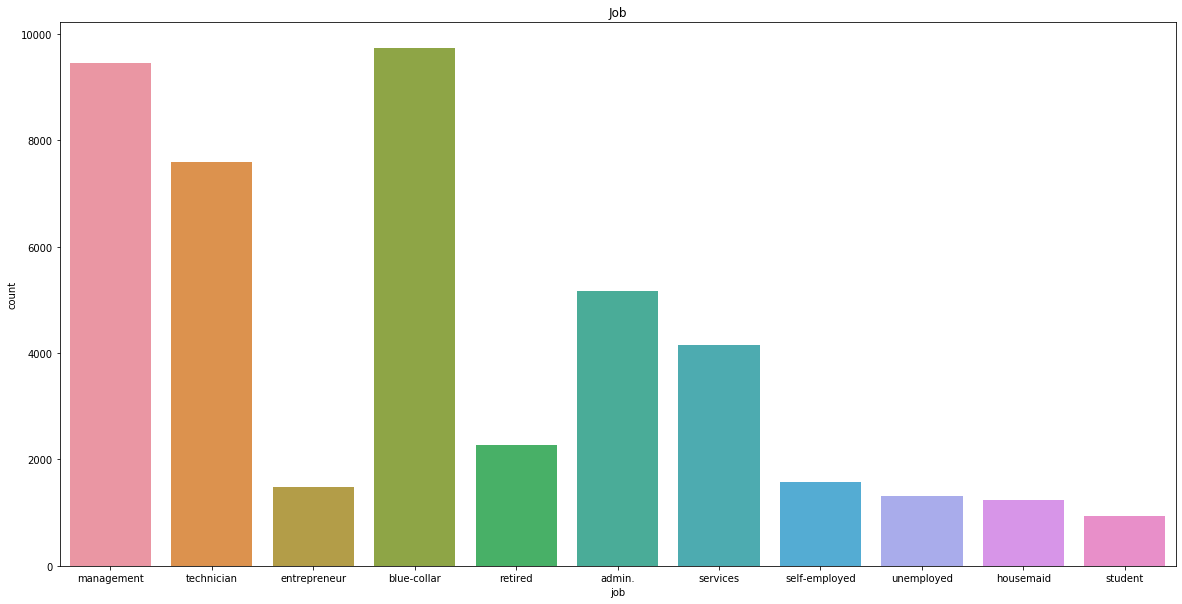

In [240]:
plt.figure(figsize=(20,10))
plt.title('Job')
sns.countplot(df['job'])

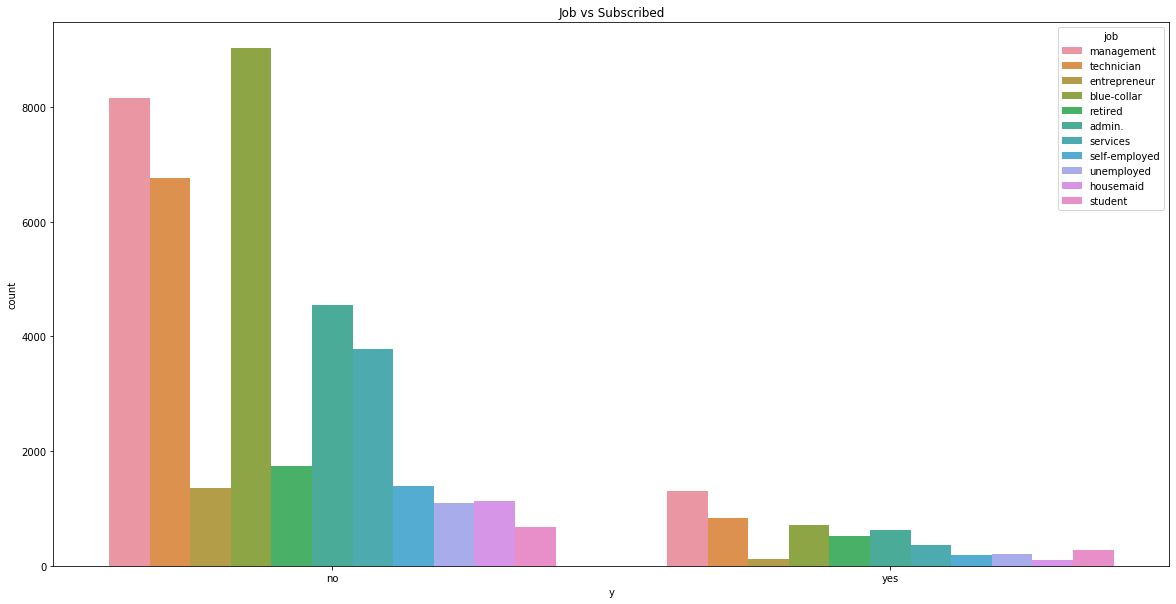

In [241]:
plt.figure(figsize=(20,10))
plt.title('Job vs Subscribed')
sns.countplot(df['y'],hue=df['job'])

#### Most of banking's customer is Management and blue-collar.
#### Even no. of blue-collar in our database is slightly more than management, management is the group with highest subscription rate.

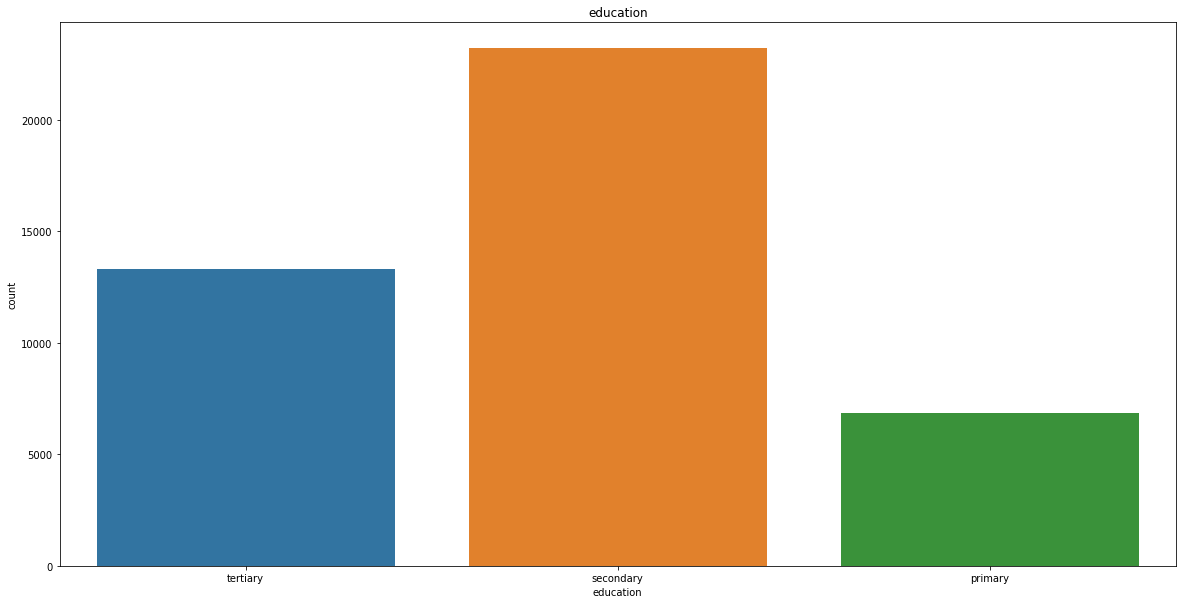

In [242]:
plt.figure(figsize=(20,10))
plt.title('education')
sns.countplot(df['education'])

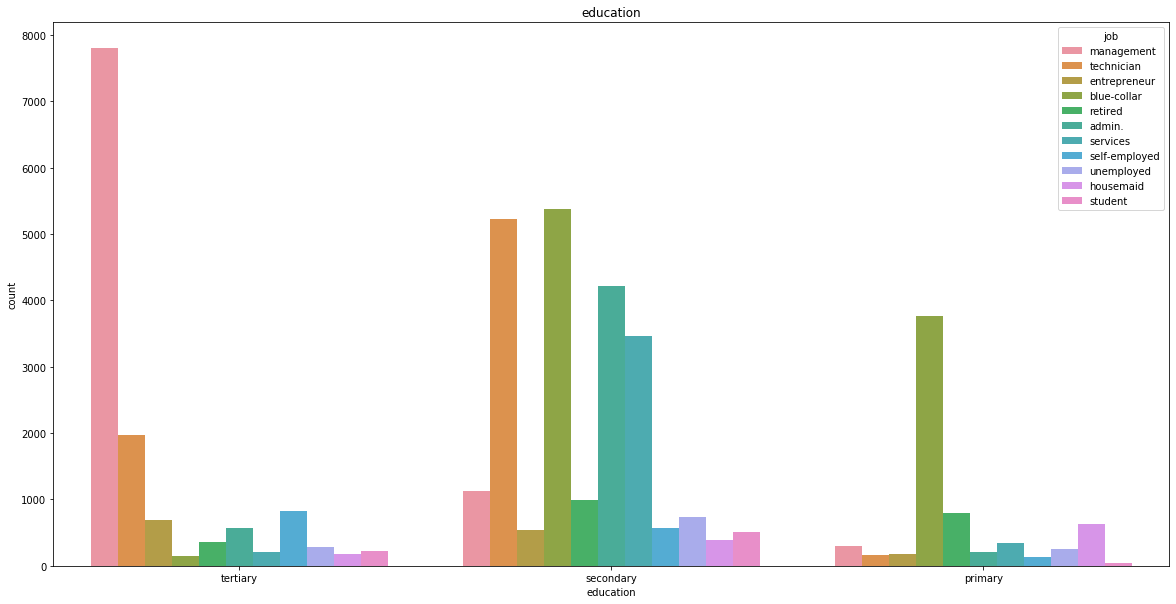

In [243]:
plt.figure(figsize=(20,10))
plt.title('education')
sns.countplot(df['education'],hue=df['job'])

#### It's not suprised that customer who are management with tertiary level, while customer who are blue-collar, with secondary level.
#### This is useful information for us to fill missing value as the total no.of management and blue-collar are similar in our database.

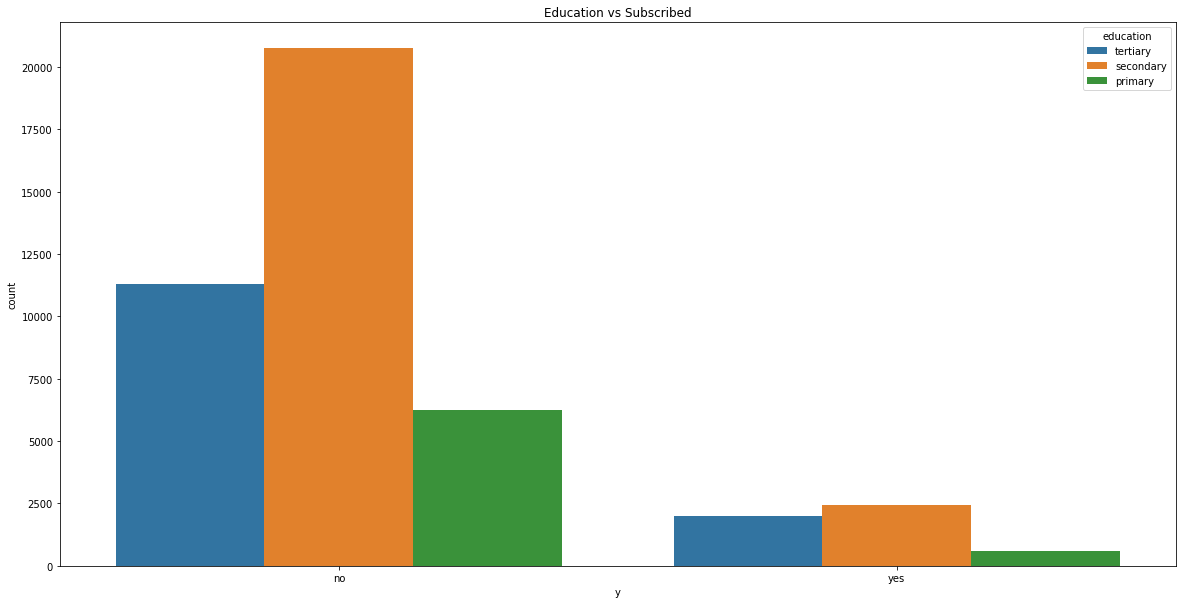

In [244]:
plt.figure(figsize=(20,10))
plt.title('Education vs Subscribed')
sns.countplot(df['y'],hue=df['education'])

#### In our database, majority customer are secondary, but amony each education level, Tertiary has higher chance to subscribe.

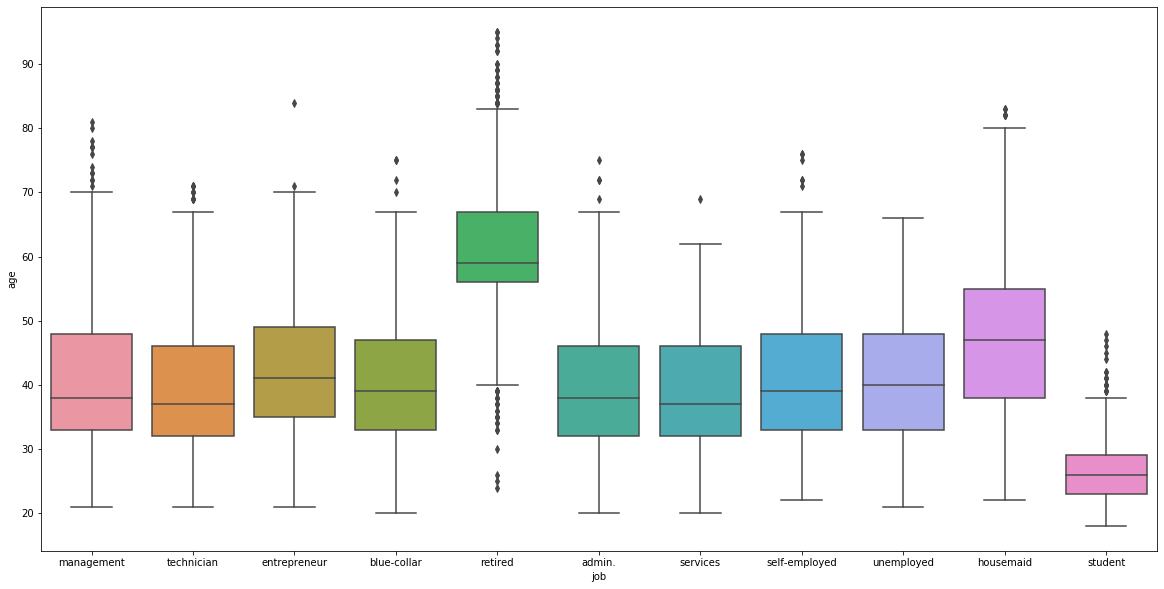

In [245]:
plt.figure(figsize=(20,10))
sns.boxplot(x='job', y='age',data=df)

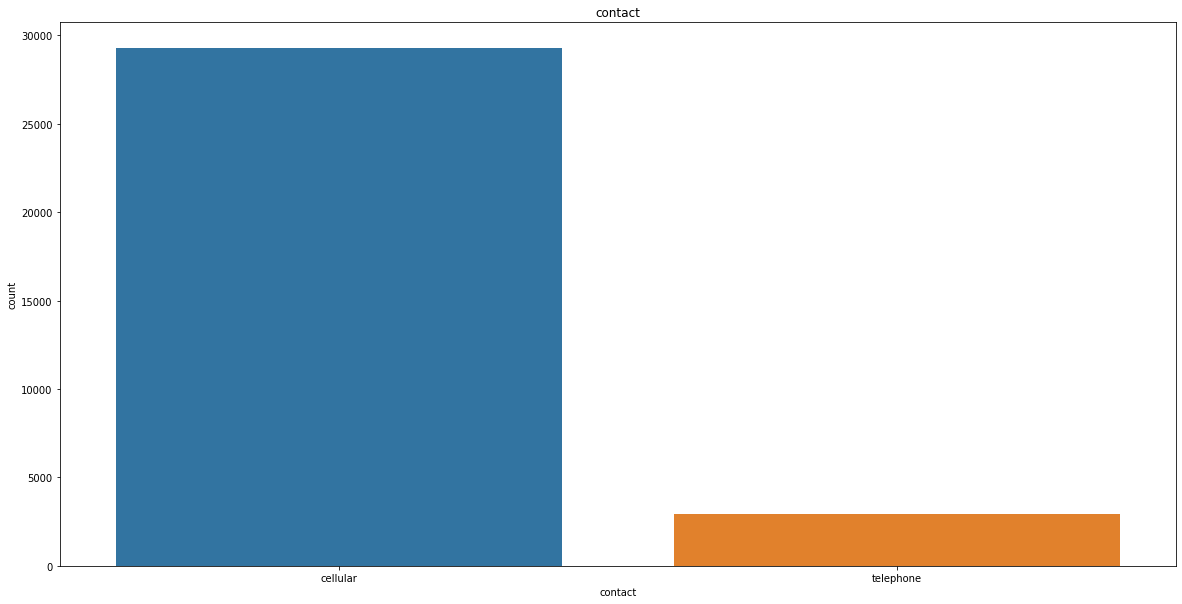

In [246]:
plt.figure(figsize=(20,10))
plt.title('contact')
sns.countplot(df['contact'])

#### The bank use celluar 10 times more than telephone

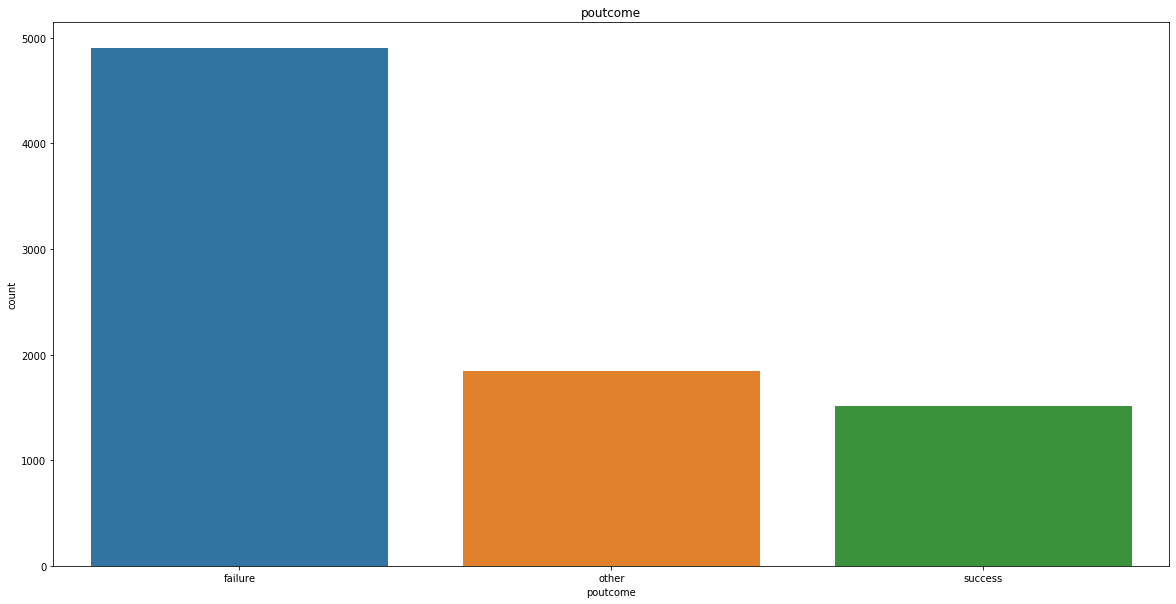

In [247]:
plt.figure(figsize=(20,10))
plt.title('poutcome')
sns.countplot(df['poutcome'])

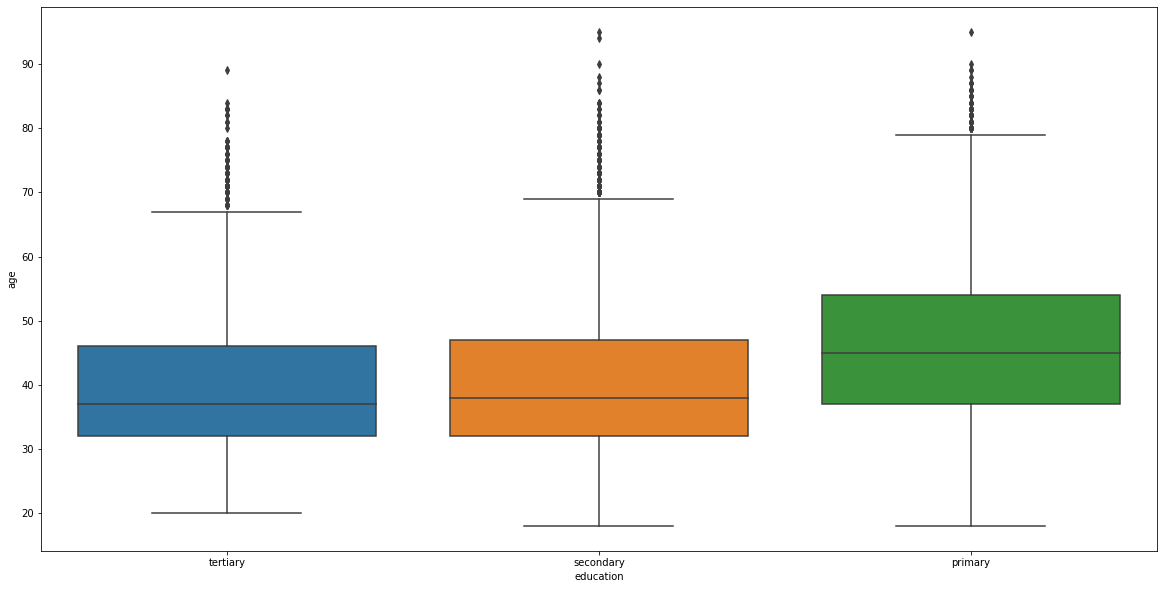

In [248]:
plt.figure(figsize=(20,10))
sns.boxplot(x='education', y='age',data=df)

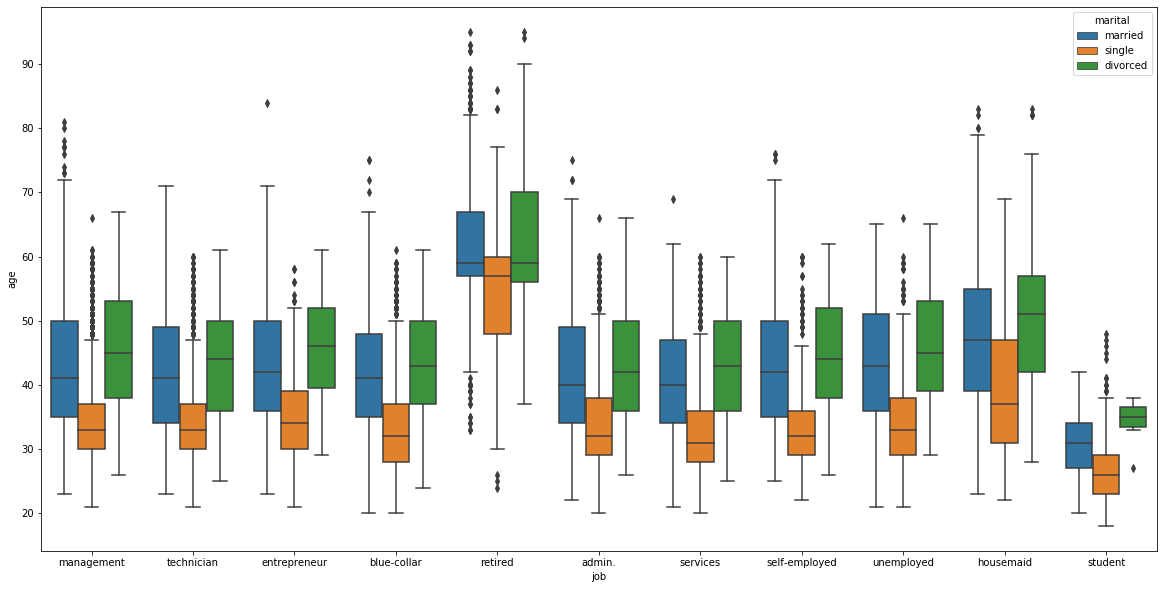

In [249]:
plt.figure(figsize=(20,10))
sns.boxplot(x='job', y='age',hue='marital',data=df)

In [251]:
## Fill Missing Value 

## Fill Missing Job
df.loc[(df.job.isnull()==True) & (df.age<=30),'job']='student'
df.loc[(df.job.isnull()==True) & (df.age>55),'job']='retired'
df.loc[(df.job.isnull()==True) & (df.education=='tertiary'),'job']='management'
df.loc[df.job.isnull()==True,'job']='blue-collar'

## Fill Education Job
df.loc[(df.education.isnull()==True) & (df.age>45),'education']='primary'
df.loc[df.education.isnull()==True,'education']='secondary'

## Fill contact Job
df.loc[df.contact.isnull()==True,'contact']='cellular'

## Fill poutcome Job
df.loc[df.poutcome.isnull()==True,'poutcome']='failure'

df.isnull().sum()
df.head()


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,cellular,5,may,261,1,-1,0,failure,no
1,44,technician,single,secondary,no,29,yes,no,cellular,5,may,151,1,-1,0,failure,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,cellular,5,may,76,1,-1,0,failure,no
3,47,blue-collar,married,primary,no,1506,yes,no,cellular,5,may,92,1,-1,0,failure,no
4,33,blue-collar,single,secondary,no,1,no,no,cellular,5,may,198,1,-1,0,failure,no


# Feature Engineering

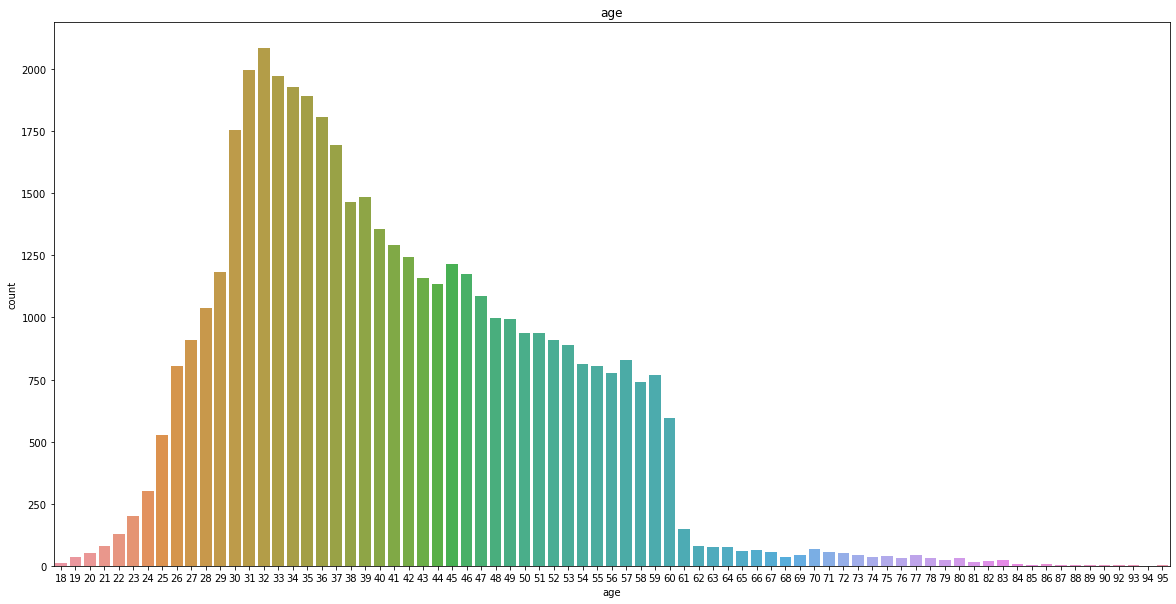

In [253]:
plt.figure(figsize=(20,10))
plt.title('age')
sns.countplot(df['age'])

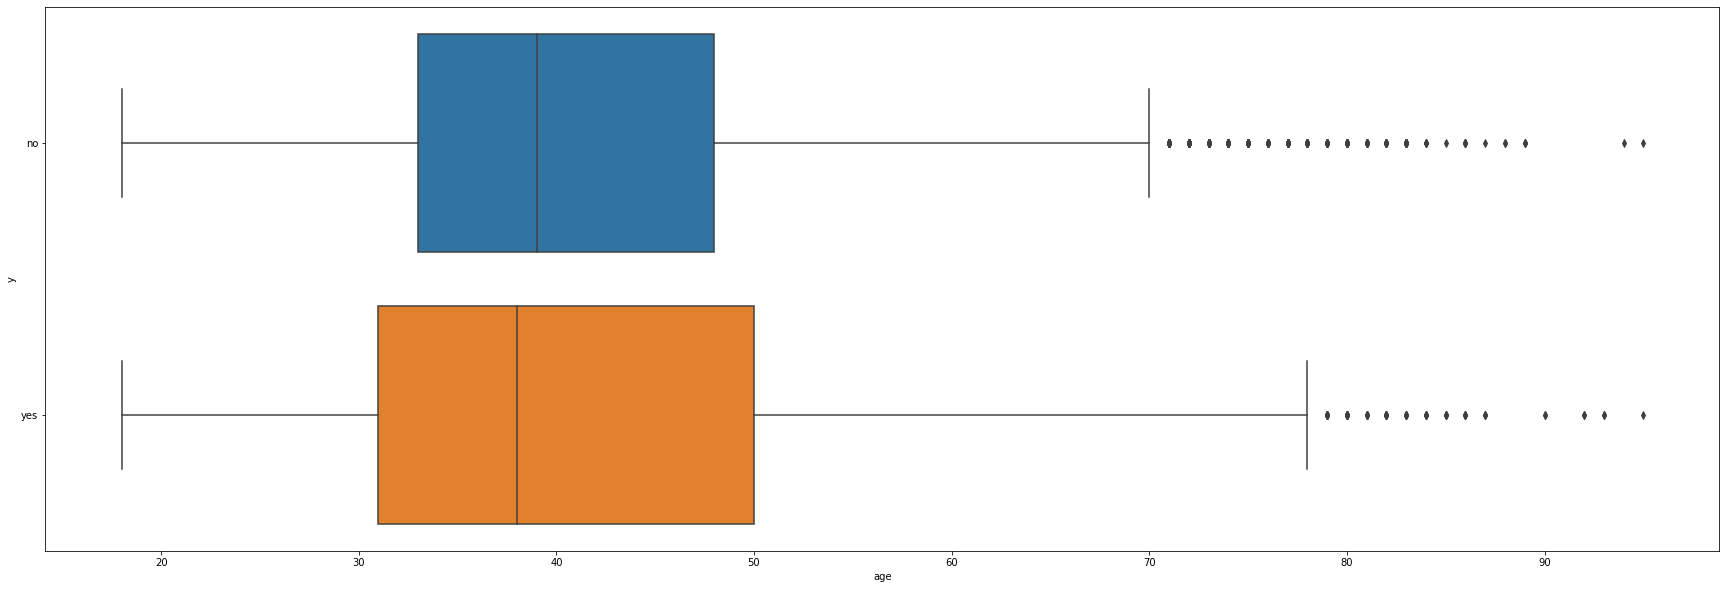

In [254]:
## Check duration and deal with outlier
plt.figure(figsize=(30,10))
sns.boxplot(x='age',y='y',data=df)

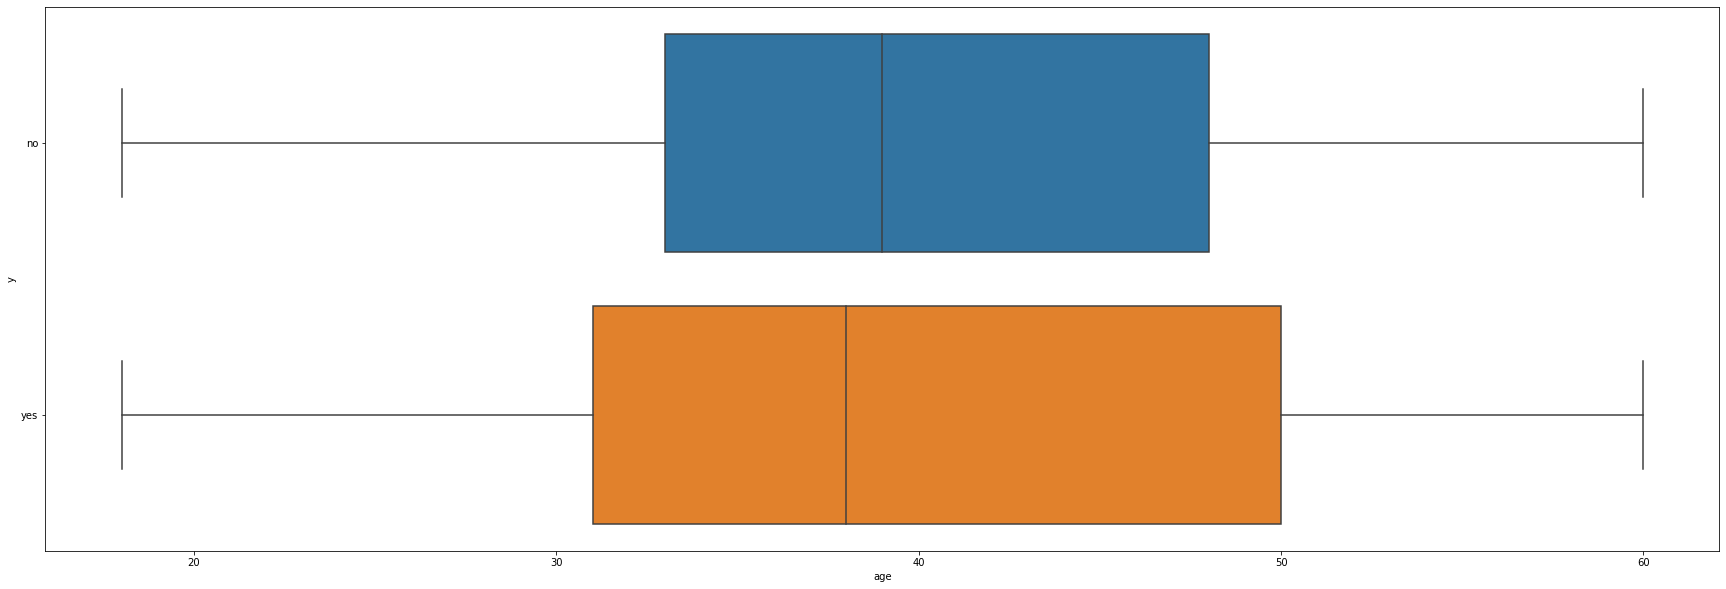

In [255]:
## Make all age Outlier as 60
df.loc[df.age>60,'age']=60

plt.figure(figsize=(30,10))
sns.boxplot(x='age',y='y',data=df)


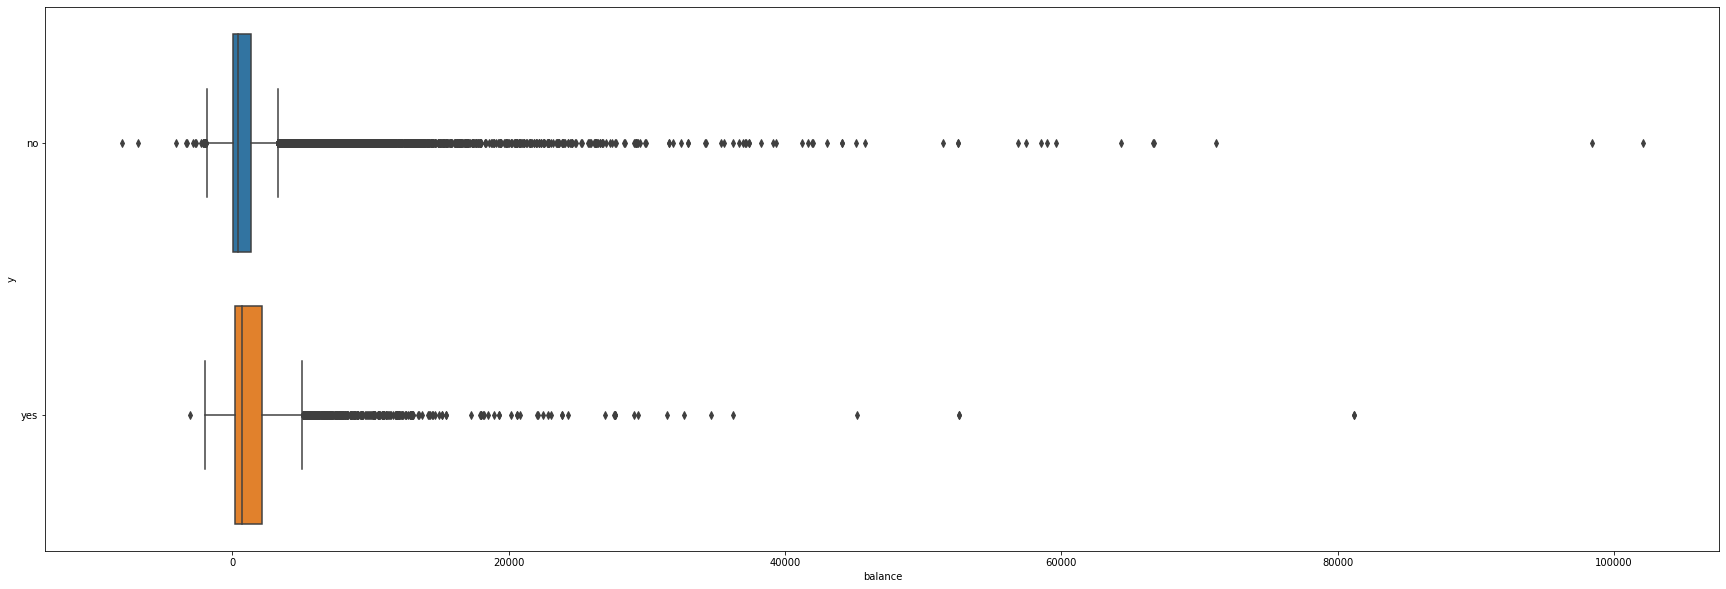

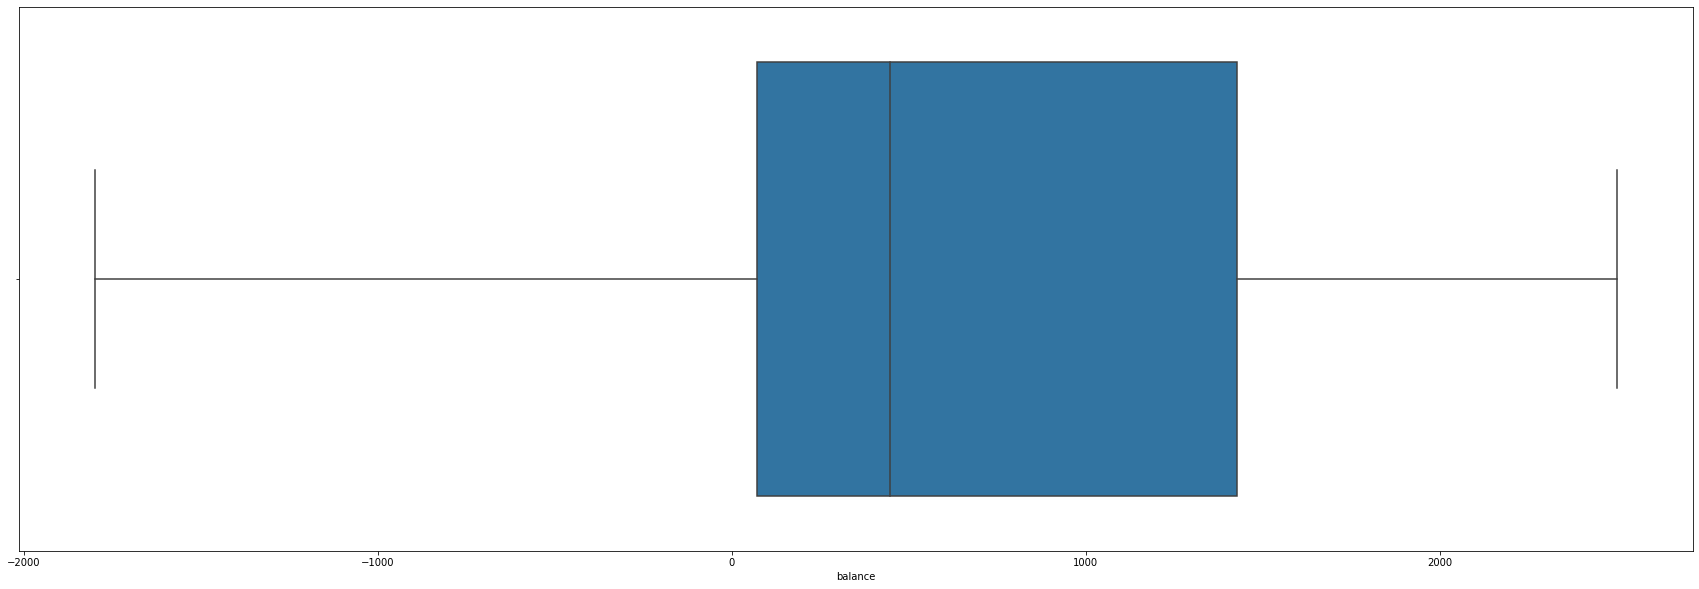

In [256]:
## Check Balance and deal with outlier
plt.figure(figsize=(30,10))
sns.boxplot(x='balance',y='y',data=df)

#Make all Balance Outlier as 2000
df.loc[df.balance>2000,'balance']=2500
df.loc[df.balance<-1800,'balance']=-1800

plt.figure(figsize=(30,10))
sns.boxplot(x='balance',data=df)

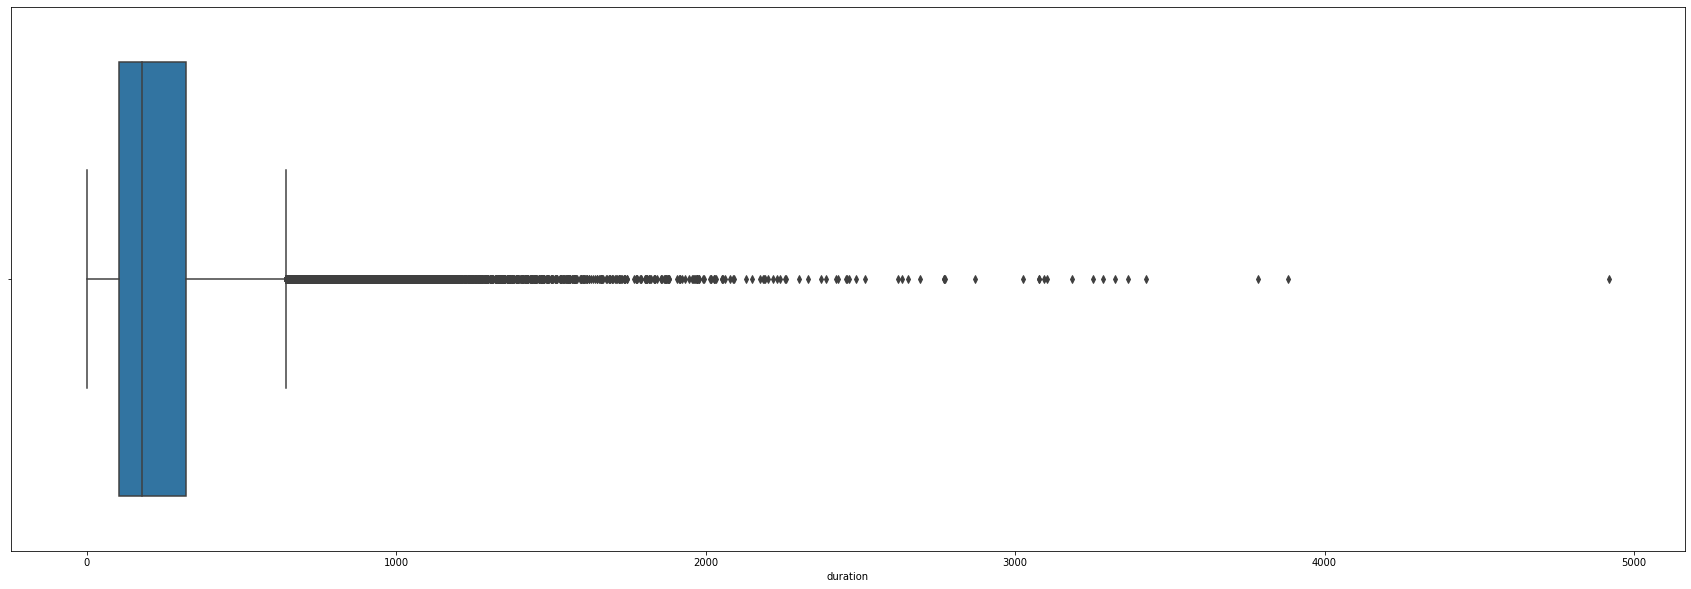

In [257]:
## Check duration and deal with outlier
plt.figure(figsize=(30,10))
sns.boxplot(x='duration',data=df)

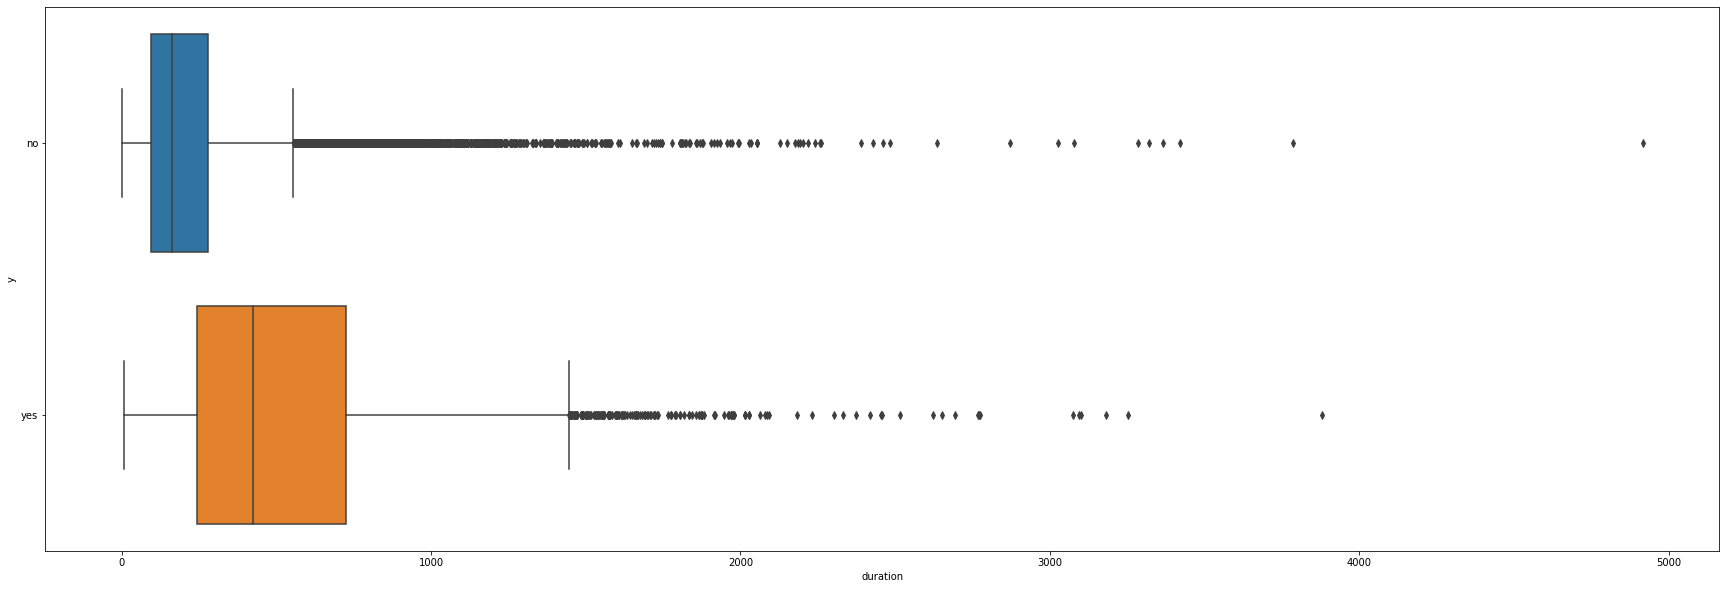

In [258]:
## Check duration and deal with outlier
plt.figure(figsize=(30,10))
sns.boxplot(x='duration',y='y',data=df)

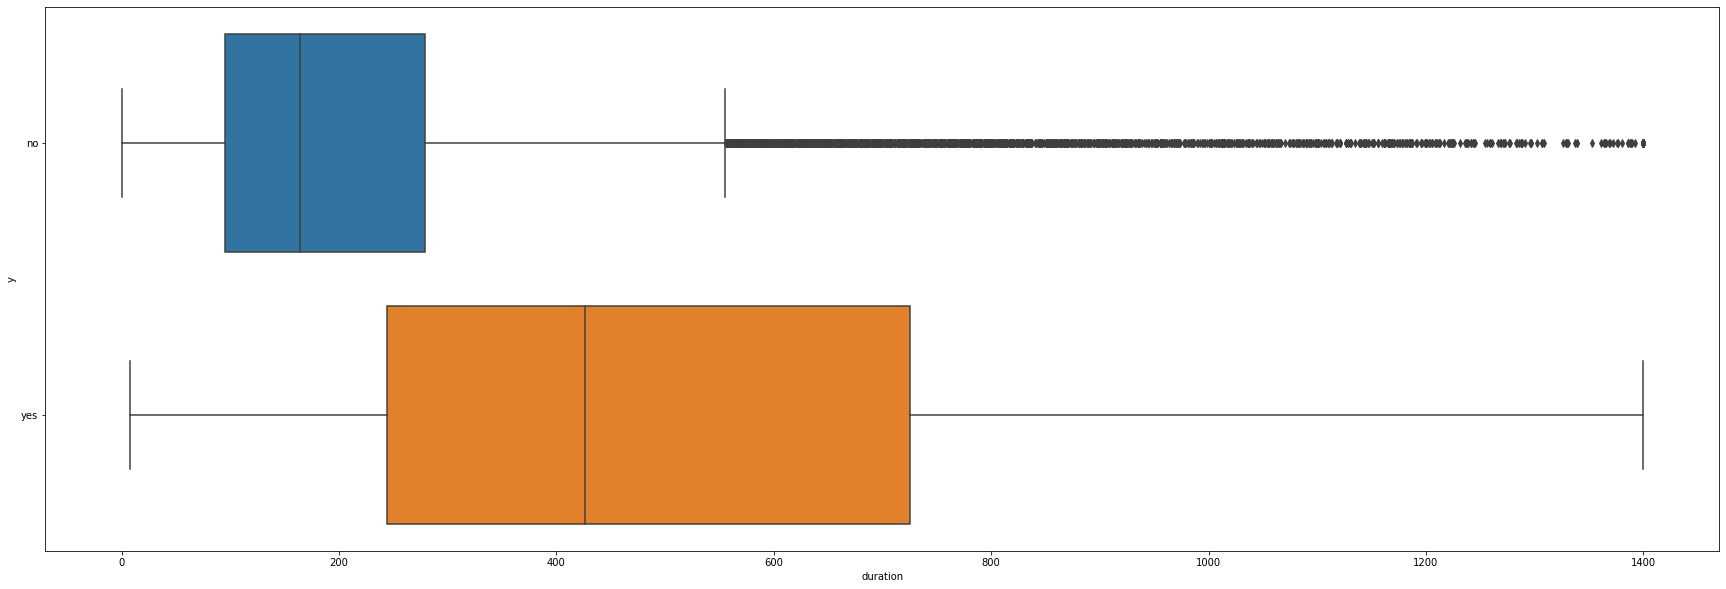

In [259]:
## Make all duration Outlier as 1450
df.loc[df.duration>1400,'duration']=1400

plt.figure(figsize=(30,10))
sns.boxplot(x='duration',y='y',data=df)

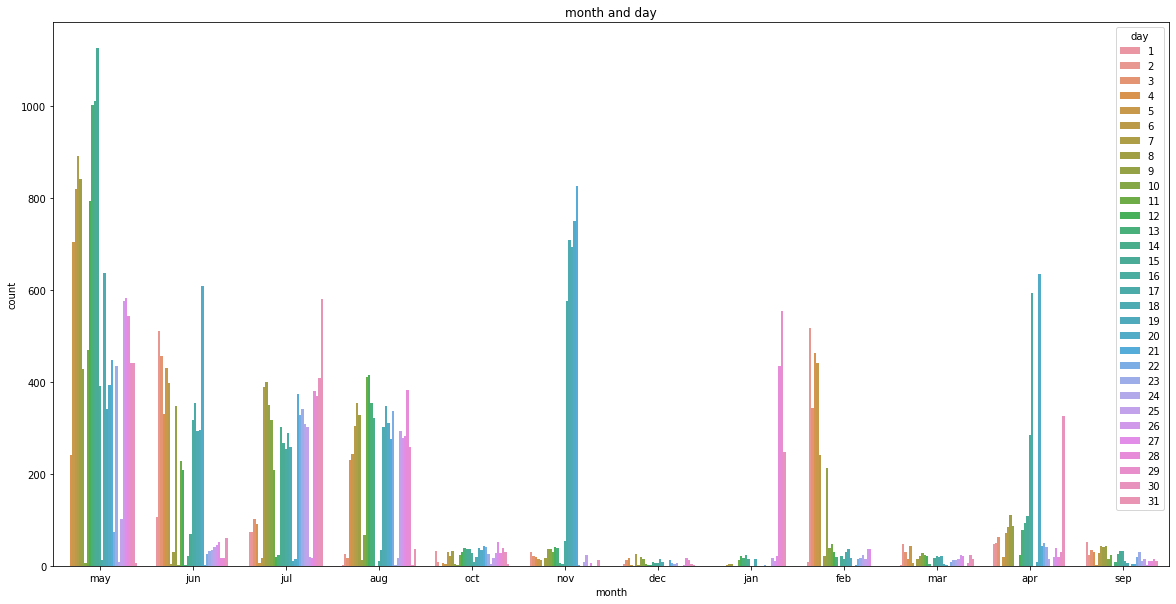

In [260]:
## Check month and deal with outlier
plt.figure(figsize=(20,10))
plt.title('month and day')
sns.countplot(df['month'],hue=df['day'])
#sns.countplot(df['month'])

In [261]:
df.loc[(df.day>=1) & (df.day<=7),'Week']='Week 1'
df.loc[(df.day>=8) & (df.day<=15),'Week']='Week 2'
df.loc[(df.day>=16) & (df.day<=22),'Week']='Week 3'
df.loc[df.day>=23,'Week']='Week 4'

df.loc[(df.month=='may') | (df.month=='jun') | (df.month=='jul') | (df.month=='aug')  ,'Month_group']='Month_group 1'
df.loc[(df.month=='jan') | (df.month=='feb') | (df.month=='mar') | (df.month=='apr')  ,'Month_group']='Month_group 2'
df.loc[(df.month=='sep') | (df.month=='oct') | (df.month=='nov') | (df.month=='dec')  ,'Month_group']='Month_group 3'


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text xticklabel objects>)

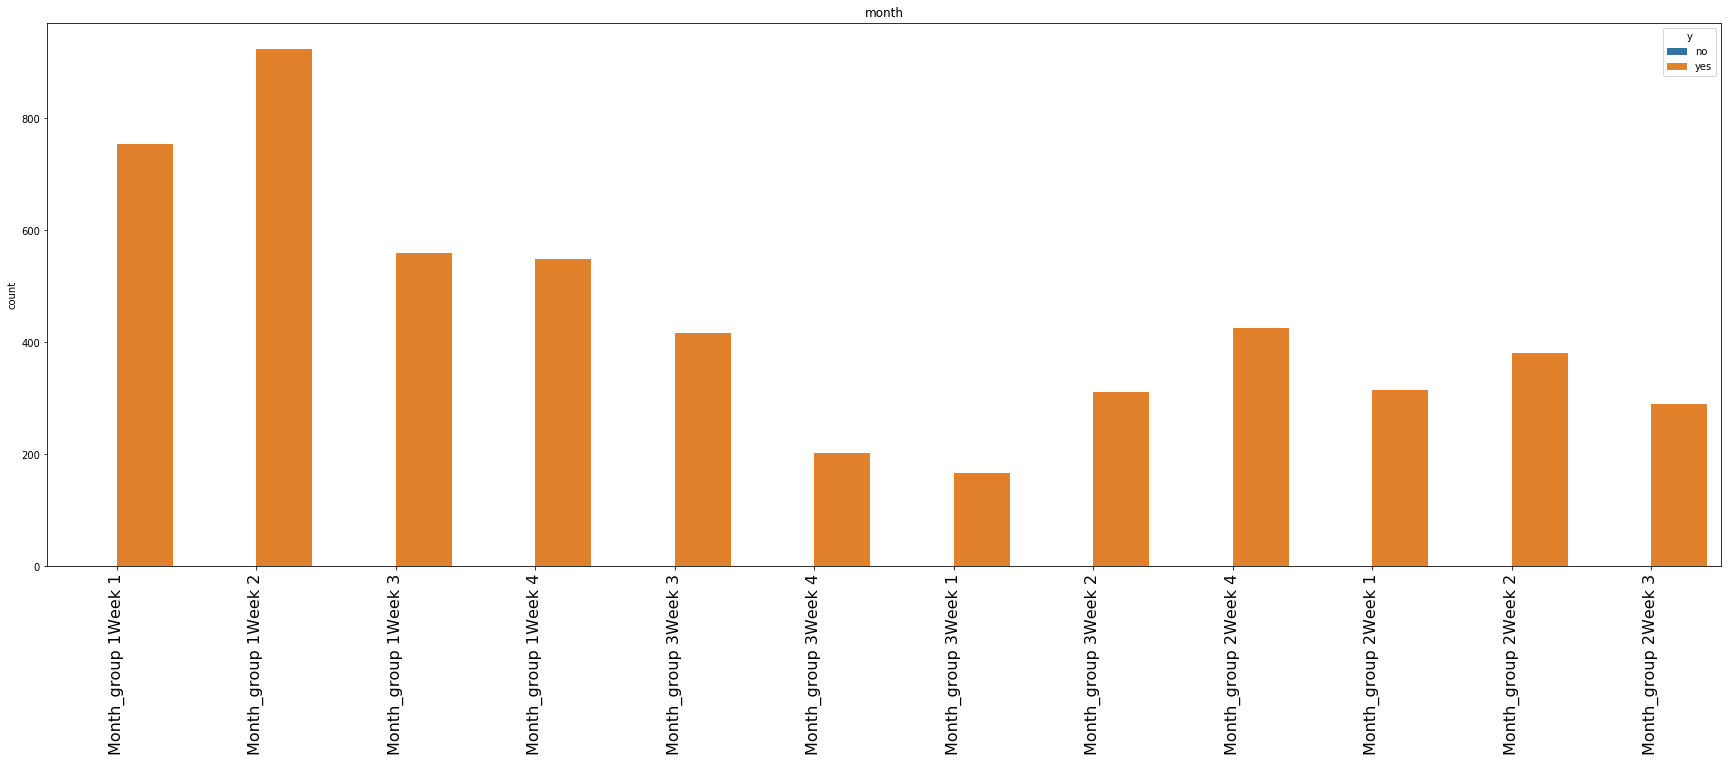

In [262]:
## Check month and deal with outlier
show=df[df['y']=='yes']
plt.figure(figsize=(30,10))
plt.title('month')
sns.countplot(show['Month_group']+show['Week'],hue=df['y'])
plt.xticks(rotation=90,size=16)
#sns.countplot(df['month'])

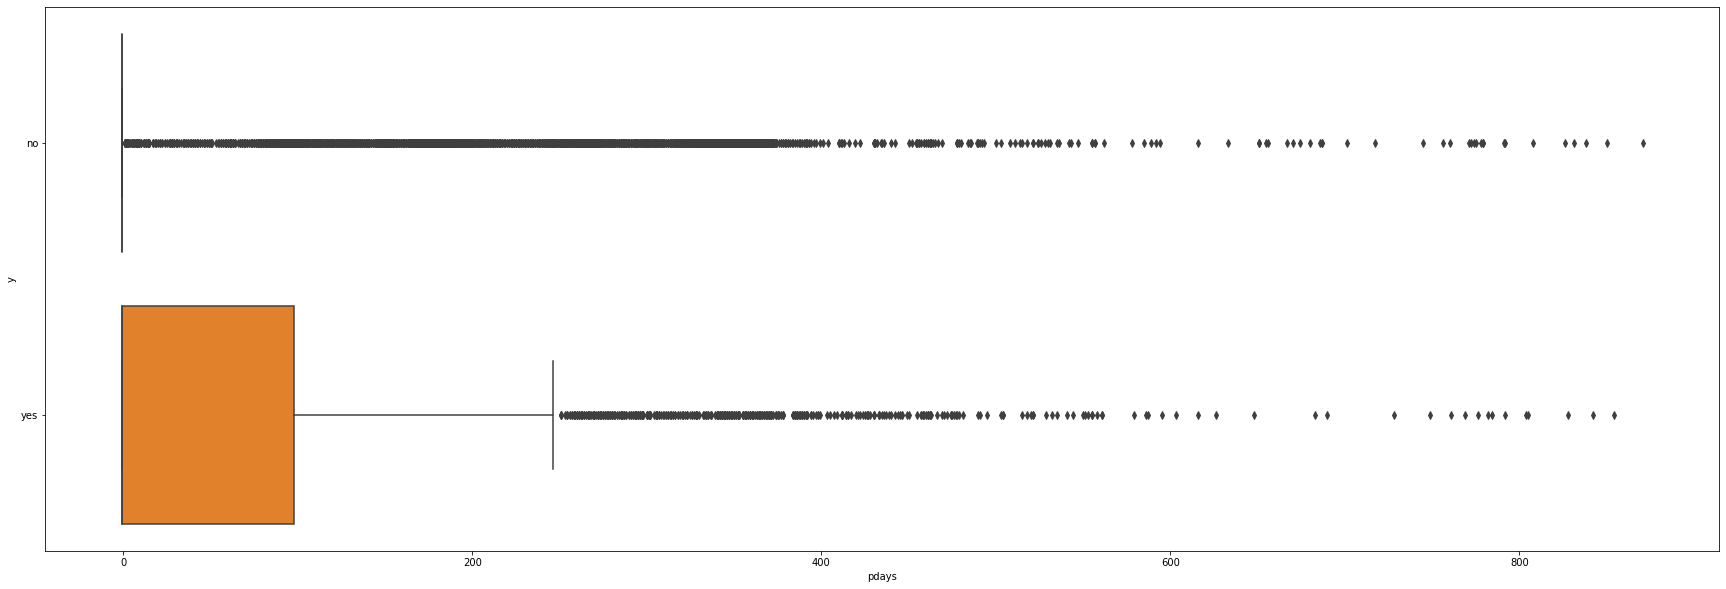

In [263]:
plt.figure(figsize=(30,10))
sns.boxplot(x='pdays',y='y',data=df)

In [264]:
df.loc[df.pdays<=0,'p_day_Group']='0. No Call Before'
df.loc[(df.pdays>0)   & (df.pdays<=60),'p_day_Group']='1. Call within 2 Months'
df.loc[(df.pdays>60)  & (df.pdays<=120),'p_day_Group']='2. Call within 2-4 Months'
df.loc[(df.pdays>120)  & (df.pdays<=180),'p_day_Group']='3. Call within 4-6 Months'
df.loc[(df.pdays>180),'p_day_Group']='4. Call more than 6 Months'

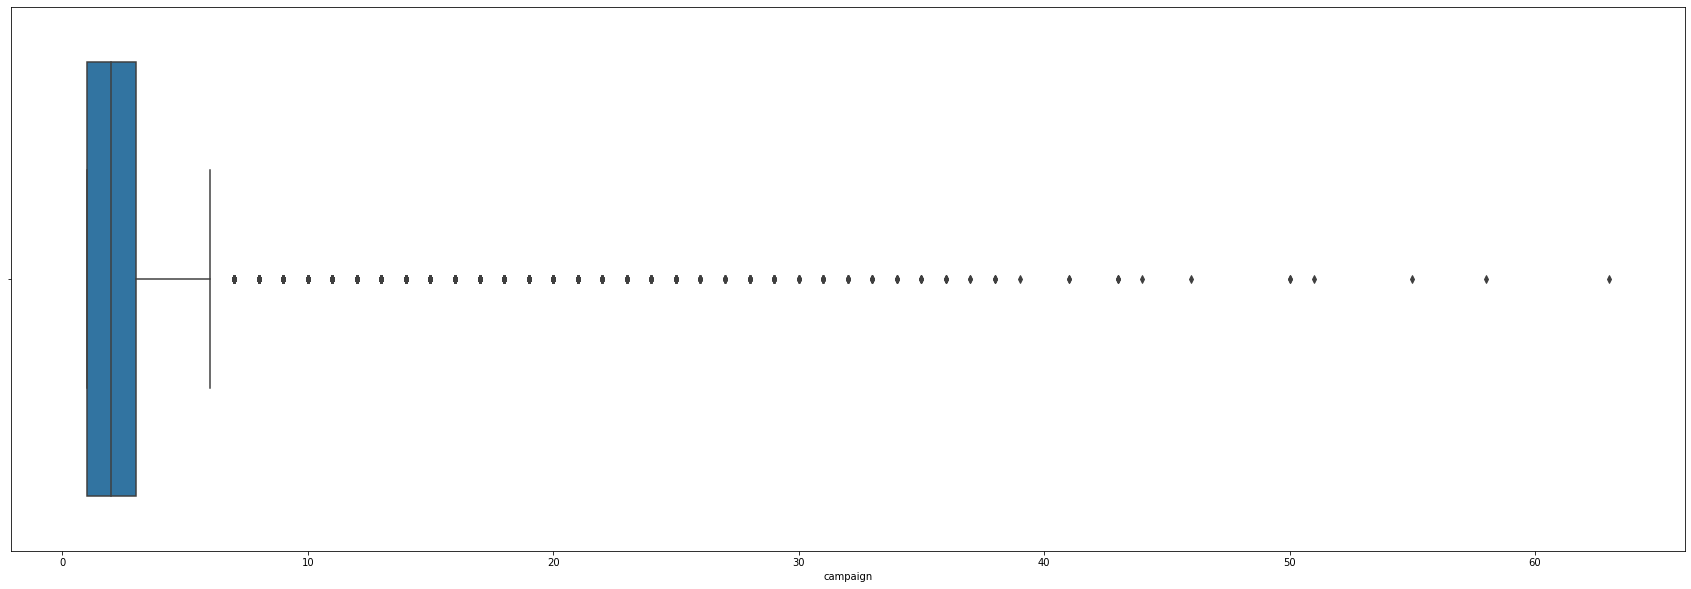

In [265]:
plt.figure(figsize=(30,10))
sns.boxplot(x='campaign',data=df)

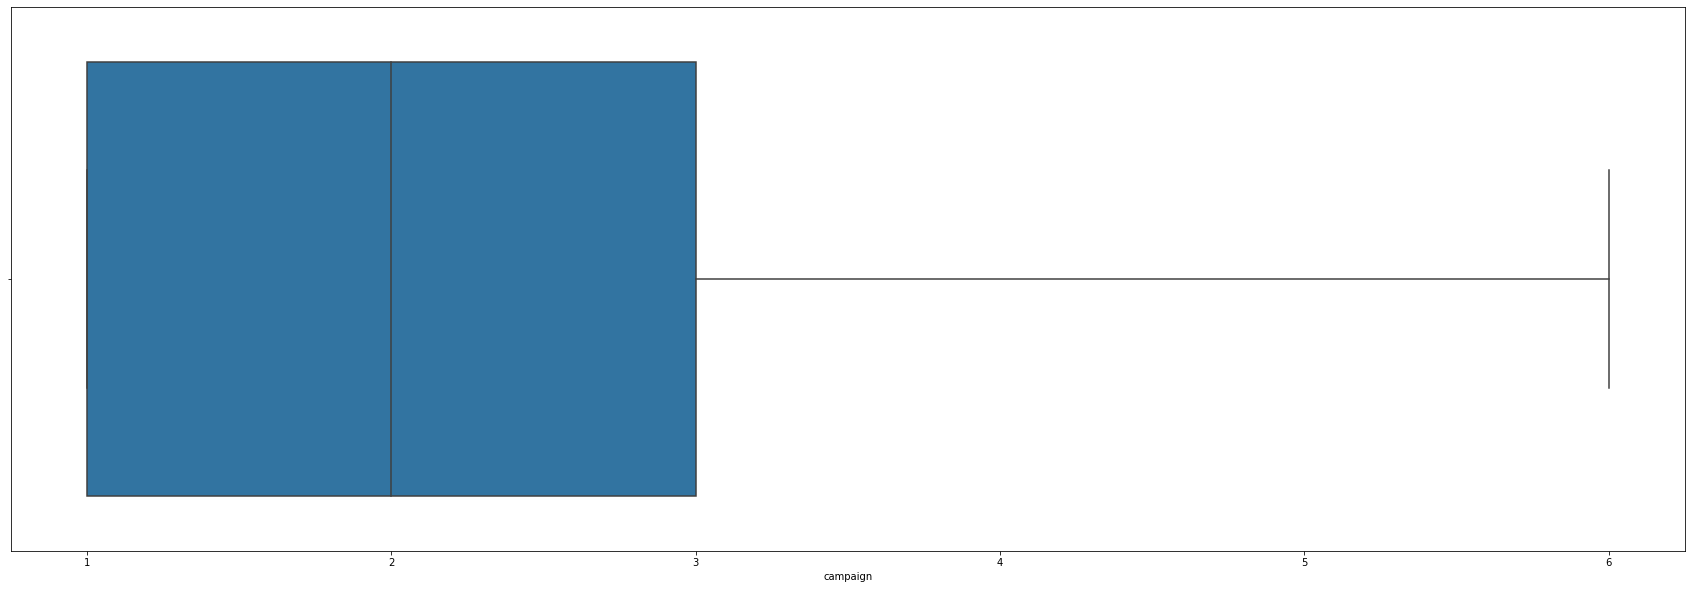

In [266]:
df.loc[(df.campaign>6),'campaign']=6

plt.figure(figsize=(30,10))
sns.boxplot(x='campaign',data=df)

In [267]:
df.loc[df.campaign==1,'Campaign_Group']='1'
df.loc[df.campaign==2,'Campaign_Group']='2'
df.loc[df.campaign==3,'Campaign_Group']='3'
df.loc[df.campaign>3,'Campaign_Group']='>=4'

In [268]:
df.Campaign_Group.value_counts()

1      17544
2      12505
>=4     9641
3       5521
Name: Campaign_Group, dtype: int64

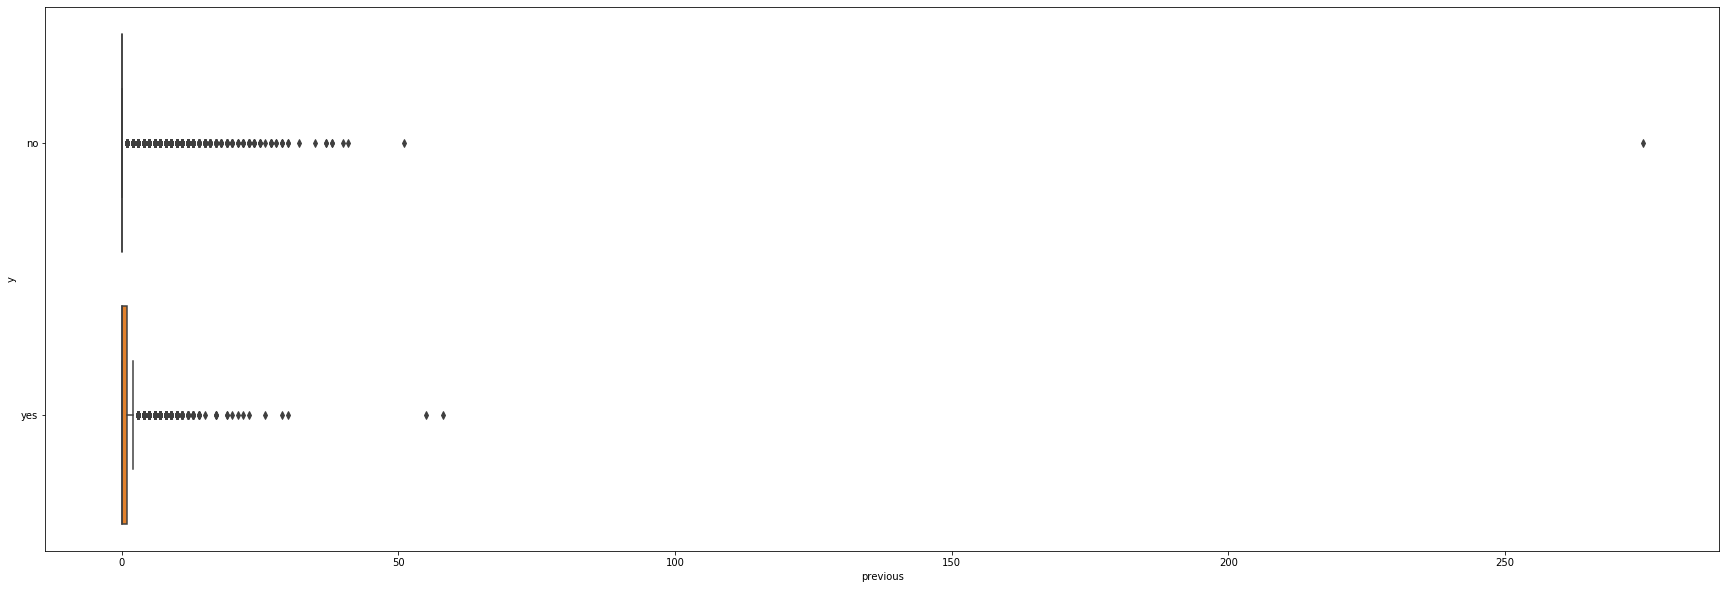

In [269]:
plt.figure(figsize=(30,10))
sns.boxplot(x='previous',y='y',data=df)

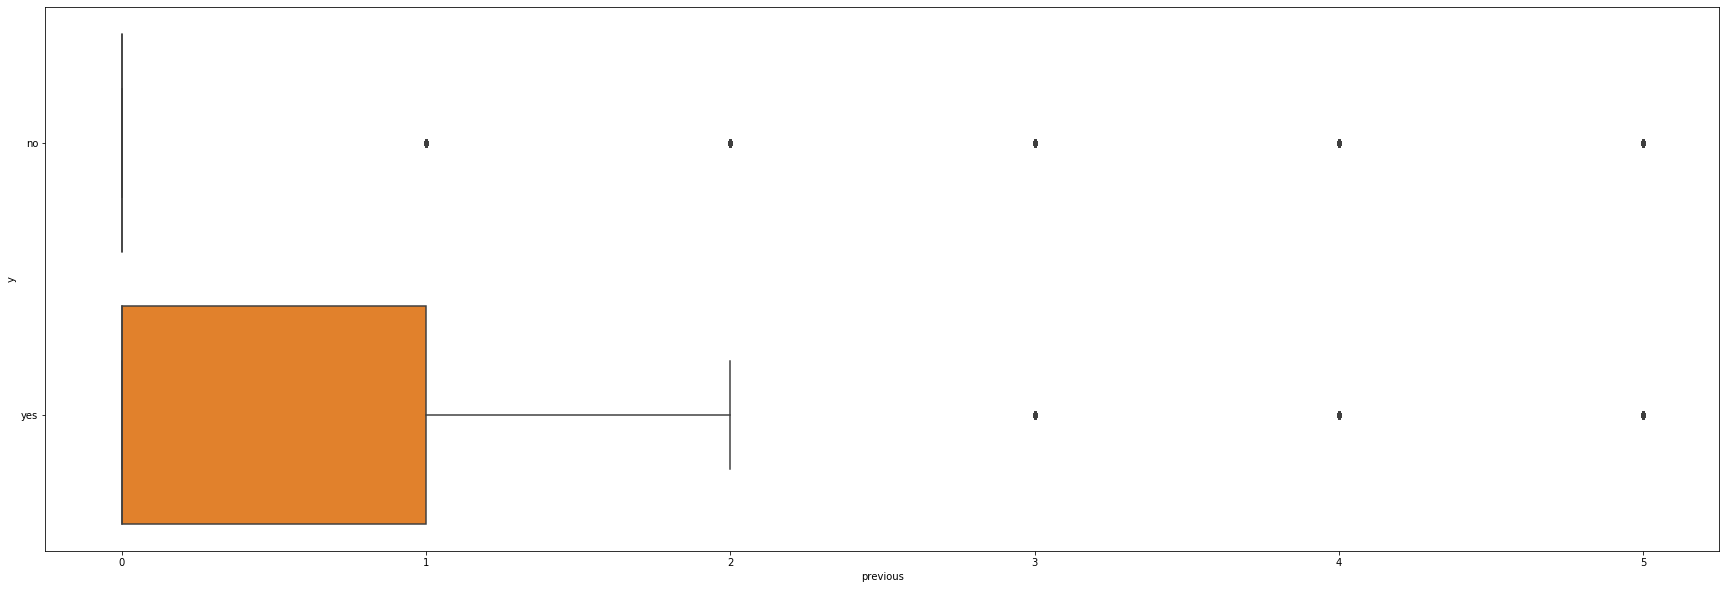

In [270]:
df.loc[(df.previous>5),'previous']=5

plt.figure(figsize=(30,10))
sns.boxplot(x='previous',y='y',data=df)

In [271]:
df.loc[df.previous==-1,'previous_Group']='-1'
df.loc[df.previous==0,'previous_Group']='0'
df.loc[df.previous==1,'previous_Group']='1'
df.loc[df.previous==2,'previous_Group']='2'
df.loc[df.previous>2,'previous_Group']='>=2'

df.previous_Group.value_counts()

0      36954
>=2     3379
1       2772
2       2106
Name: previous_Group, dtype: int64

In [272]:
df['day']=df['day'].astype('str')

In [273]:
df_cat=df[['job','marital','education','default','housing','loan','contact','Week','Month_group','poutcome','p_day_Group','Campaign_Group','previous_Group']] #Discreate Dataset
df_int=df[['age','balance','duration']] # Numerical Dataset

In [274]:
#Convert categorical variable into dummy/indicator variables.
df_cat1=pd.get_dummies(df_cat)

In [275]:
df_int.describe()

,age,balance,duration
count,45211.000000,45211.000000,45211.000000
mean,40.683440,821.763929,255.453982
std,9.964526,953.041485,239.841828
min,18.000000,-1800.000000,0.000000
25%,33.000000,72.000000,103.000000
50%,39.000000,448.000000,180.000000
75%,48.000000,1428.000000,319.000000
max,60.000000,2500.000000,1400.000000


In [276]:
#Scale numerical data between 0 and 1
scaler = MinMaxScaler()
df_int2=pd.DataFrame(scaler.fit_transform(df_int))
df_int2.columns= ['age','balance','duration']

In [277]:
X0=pd.concat((df_int2,df_cat1),axis=1)
y0=pd.DataFrame(df.loc[:,'y'])
y0['y']=y0['y'].apply(lambda x: 0 if x=='no' else 1)

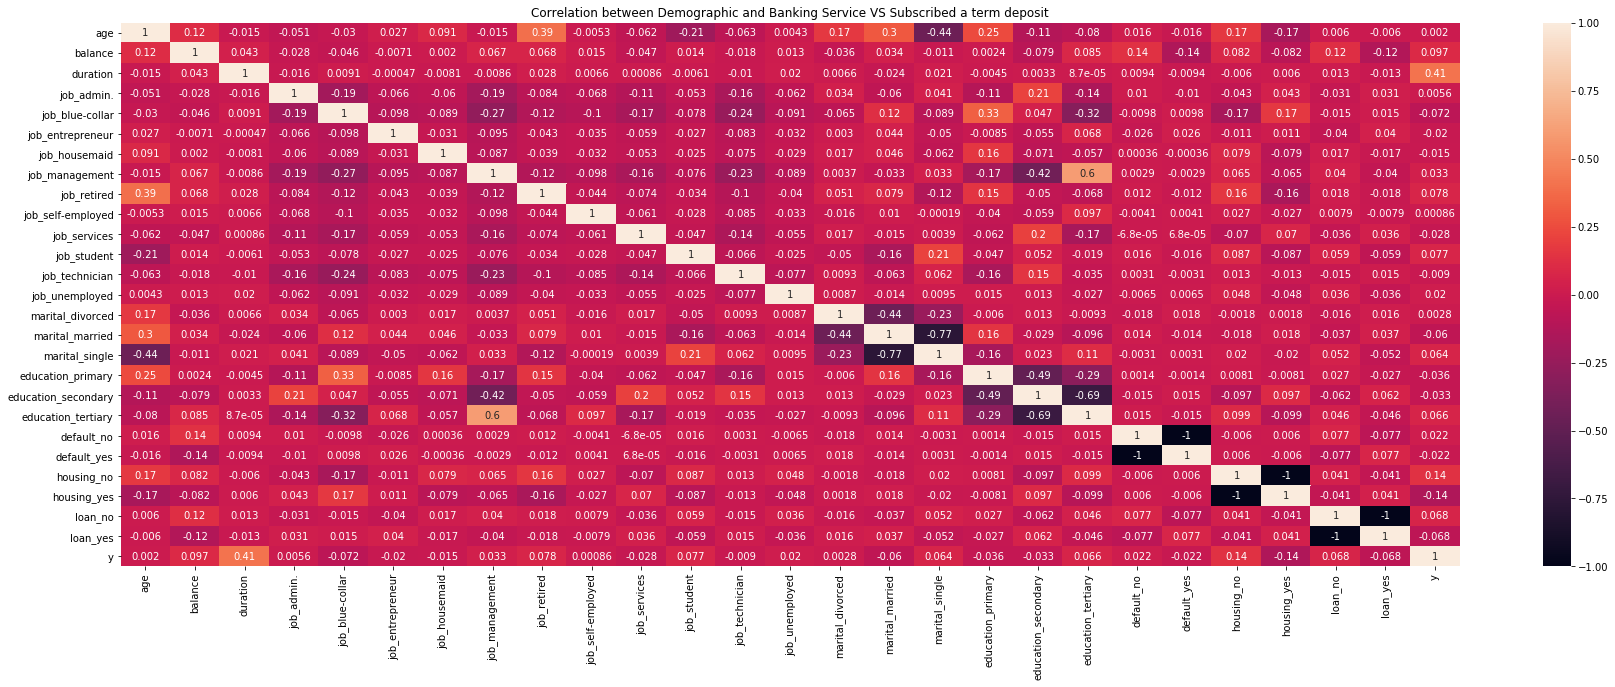

In [278]:
plt.figure(figsize=(30,10))
plt.title('Correlation between Demographic and Banking Service VS Subscribed a term deposit')
Corr=pd.concat((X0[['age', 'balance', 'duration', 
 'job_admin.', 'job_blue-collar','job_entrepreneur', 'job_housemaid', 'job_management','job_retired', 
 'job_self-employed', 'job_services','job_student','job_technician', 'job_unemployed', 'marital_divorced',
 'marital_married', 'marital_single', 
 'education_primary','education_secondary', 'education_tertiary', 
 'default_no','default_yes', 'housing_no', 'housing_yes', 'loan_no', 'loan_yes']],y0),axis=1)
sns.heatmap(Corr.corr(),vmin=-1,vmax=1,annot=True)

#### Here, we can see that Duration is positive relation to Term Deposit Subscription. 

In [279]:
# Oversample data due to imbalance data
from imblearn.over_sampling import SMOTE
smk = SMOTE()
X,y=smk.fit_sample(X0,y0)

# Train Model

In [299]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [300]:
print(X_train.shape, y_train.shape,X_test.shape, y_test.shape)

(55890, 51) (55890, 1) (23954, 51) (23954, 1)


In [301]:
##Prepare list to store Score
Accuracy_Score=[]
Recall_Score=[]
Precision_Score=[]
F1_Score=[]

### Logistic Regression

In [302]:
from sklearn.linear_model import LogisticRegression
clf1 = LogisticRegression(random_state=42,max_iter=1000).fit(X_train, y_train.values.ravel())
y_pred=clf1.predict(X_test)
print(clf1.score(X_test,y_test),recall_score(y_test, y_pred),precision_score(y_test, y_pred),f1_score(y_test, y_pred) )

Accuracy_Score.append(accuracy_score(y_test, y_pred))
Recall_Score.append(recall_score(y_test, y_pred))
Precision_Score.append(precision_score(y_test, y_pred))
F1_Score.append(f1_score(y_test, y_pred))

0.8989312849628455 0.8642016526166431 0.9287764621456763 0.8953262138440918


### Support Vector Classifer SVC

In [303]:
from sklearn.svm import SVC
clf2 = SVC(random_state=42,C=0.01).fit(X_train, y_train.values.ravel())
y_pred=clf2.predict(X_test)
print(clf2.score(X_test,y_test),recall_score(y_test, y_pred),precision_score(y_test, y_pred),f1_score(y_test, y_pred) )

Accuracy_Score.append(accuracy_score(y_test, y_pred))
Recall_Score.append(recall_score(y_test, y_pred))
Precision_Score.append(precision_score(y_test, y_pred))
F1_Score.append(f1_score(y_test, y_pred))

0.9200133589379644 0.9141140138552708 0.9250781315989526 0.9195633921074726


### KNN

In [304]:
from sklearn.neighbors import KNeighborsClassifier
clf3 = KNeighborsClassifier(n_neighbors=5).fit(X_train, y_train.values.ravel())
y_pred=clf3.predict(X_test)
print(clf3.score(X_test,y_test),recall_score(y_test, y_pred),precision_score(y_test, y_pred),f1_score(y_test, y_pred) )

Accuracy_Score.append(accuracy_score(y_test, y_pred))
Recall_Score.append(recall_score(y_test, y_pred))
Precision_Score.append(precision_score(y_test, y_pred))
F1_Score.append(f1_score(y_test, y_pred))

0.8742172497286466 0.9338953342792755 0.8343773303504847 0.8813359064235359


### Random Forest

In [387]:
from sklearn.ensemble import RandomForestClassifier
clf4 = RandomForestClassifier(random_state=42).fit(X_train, y_train.values.ravel())
y_pred=clf4.predict(X_test)
print(clf4.score(X_test,y_test),recall_score(y_test, y_pred),precision_score(y_test, y_pred),f1_score(y_test, y_pred) )

Accuracy_Score.append(accuracy_score(y_test, y_pred))
Recall_Score.append(recall_score(y_test, y_pred))
Precision_Score.append(precision_score(y_test, y_pred))
F1_Score.append(f1_score(y_test, y_pred))

0.9291976287885113 0.9589349803856105 0.9051445678720554 0.9312636783658912


### XGBoosing

In [405]:
import xgboost as xgb
dtrain = xgb.DMatrix(data = X_train, label = y_train) 
dtest = xgb.DMatrix(data = X_test, label = y_test) 
# specify parameters via map
param = {'max_depth':11, 'eta':0.3, 'objective':'binary:hinge' }
num_round = 100
clf5 = xgb.train(param, dtrain, num_round)
# make prediction
y_pred = clf5.predict(dtest)
print(accuracy_score(y_test, y_pred),recall_score(y_test, y_pred),precision_score(y_test, y_pred),f1_score(y_test, y_pred) )

Accuracy_Score.append(accuracy_score(y_test, y_pred))
Recall_Score.append(recall_score(y_test, y_pred))
Precision_Score.append(precision_score(y_test, y_pred))
F1_Score.append(f1_score(y_test, y_pred))

0.9295316022376221 0.9280527501877973 0.9308497279196316 0.9294491348323999


In [403]:
#Accuracy_Score=Accuracy_Score[:4]
#Recall_Score=Recall_Score[:4]
#Precision_Score=Precision_Score[:4]
#F1_Score=F1_Score[:4]

# Model Evaluation

In [406]:
ind_name=['Accuracy_Score','Recall_Score','Precision_Score','F1_Score']
summary=pd.DataFrame(np.vstack((Accuracy_Score,Recall_Score,Precision_Score,F1_Score)),
                      columns=['Logistic Regression',
                               'SVC',
                               'KNN',
                               'Random Forest',
                               'XGB'],index=ind_name)
summary

,Logistic Regression,SVC,KNN,Random Forest,XGB
Accuracy_Score,0.898931,0.920013,0.874217,0.929198,0.929532
Recall_Score,0.864202,0.914114,0.933895,0.958935,0.928053
Precision_Score,0.928776,0.925078,0.834377,0.905145,0.930850
F1_Score,0.895326,0.919563,0.881336,0.931264,0.929449


#### From the above result, the Accuracy Score of Random Forest and XGB are similar and XBG is the highest, while KNN is the lowest.
#### However, in this case, as the classification goal is to predict if the client will subscribe to a term deposit, so that we can save cost for Marketing.
#### We should much concern on Precision Score. 
#### Precision Score in this case means finding True Posive based on (True Postive and Negative Postive), 
#### i.e. The rate of finding customer who will subscribed under our predict subscried customer.
#### Therefore we should choose the model with higher Precision Score, i.e. XGB, with 93.1%

# Apply the model in another test file

In [331]:
test_data=pd.read_csv('test.csv',delimiter=';')

In [332]:
## Fill Missing Value 

## Fill Missing Job
test_data.loc[(test_data.job.isnull()==True) & (test_data.age<=30),'job']='student'
test_data.loc[(test_data.job.isnull()==True) & (test_data.age>55),'job']='retired'
test_data.loc[(test_data.job.isnull()==True) & (test_data.education=='tertiary'),'job']='management'
test_data.loc[test_data.job.isnull()==True,'job']='blue-collar'

## Fill Education Job
test_data.loc[(test_data.education.isnull()==True) & (test_data.age>45),'education']='primary'
test_data.loc[test_data.education.isnull()==True,'education']='secondary'

## Fill contact Job
test_data.loc[test_data.contact.isnull()==True,'contact']='cellular'

## Fill poutcome Job
test_data.loc[test_data.poutcome.isnull()==True,'poutcome']='failure'


#Test Data Rule:
test_data.loc[ test_data.pdays<=0,'p_day_Group']='0. No Call Before'
test_data.loc[(test_data.pdays>0)   & (test_data.pdays<=60),'p_day_Group']='1. Call within 2 Months'
test_data.loc[(test_data.pdays>60)  & (test_data.pdays<=120),'p_day_Group']='2. Call within 2-4 Months'
test_data.loc[(test_data.pdays>120)  & (test_data.pdays<=180),'p_day_Group']='3. Call within 4-6 Months'
test_data.loc[(test_data.pdays>180),'p_day_Group']='4. Call more than 6 Months'


test_data.loc[test_data.previous==-1,'previous_Group']='-1'
test_data.loc[test_data.previous==0,'previous_Group']='0'
test_data.loc[test_data.previous==1,'previous_Group']='1'
test_data.loc[test_data.previous==2,'previous_Group']='2'
test_data.loc[test_data.previous>2,'previous_Group']='>=2'

test_data.loc[(test_data.day>=1) & (test_data.day<=7),'Week']='Week 1'
test_data.loc[(test_data.day>=8) & (test_data.day<=15),'Week']='Week 2'
test_data.loc[(test_data.day>=16) & (test_data.day<=22),'Week']='Week 3'
test_data.loc[test_data.day>=23,'Week']='Week 4'

test_data.loc[(test_data.month=='may') | (test_data.month=='jun') | (test_data.month=='jul') | (test_data.month=='aug')  ,'Month_group']='Month_group 1'
test_data.loc[(test_data.month=='jan') | (test_data.month=='feb') | (test_data.month=='mar') | (test_data.month=='apr')  ,'Month_group']='Month_group 2'
test_data.loc[(test_data.month=='sep') | (test_data.month=='oct') | (test_data.month=='nov') | (test_data.month=='dec')  ,'Month_group']='Month_group 3'



test_cat=df[['job','marital','education','default','housing','loan','contact','Week','Month_group','poutcome','p_day_Group','Campaign_Group','previous_Group']] #Discreate Dataset
test_int=df[['age','balance','duration']] # Numerical Dataset

In [333]:
#Convert categorical variable into dummy/indicator variables.
test_cat1=pd.get_dummies(test_cat)

#Scale numerical data between 0 and 1
#scaler = MinMaxScaler()
test_int2=pd.DataFrame(scaler.fit_transform(test_int))
test_int2.columns= ['age','balance','duration']

test_X0=pd.concat((test_int2,test_cat1),axis=1)
test_y0=pd.DataFrame(df.loc[:,'y'])
test_y0['y']=test_y0['y'].apply(lambda x: 0 if x=='no' else 1)

In [408]:
dtest_data = xgb.DMatrix(data = test_X0, label = test_y0) 
y_pred = clf5.predict(dtest_data)
print(accuracy_score(test_y0,y_pred),recall_score(test_y0, y_pred),precision_score(test_y0, y_pred),f1_score(test_y0, y_pred) )

0.960009732144832 0.8347513707695217 0.8253879229762573 0.8300432412107539


#### Let's see the result, the accurate rate is 96% and the Precision Score has a little bit drop to 83%